# Algoritmo de búsqueda primero en profundidad

El algoritmo de búsqueda primero en profundidad o depth-first search se basa en expandir los nodos que se encuentren a mayor profundidad en éste. De esta forma, los primeros nodos en expandirse serán aquellos que estén más bajo dentro de la profundidad del árbol. Esto contrasta con el algoritmo de primero en amplitud, pues este algoritmo expandía, de manera contraria, los nodos de menor profundidad primero.

Esta estrategia permite al algoritmo tratar de encontrar una solución en los nodos que resultaron de acciones consecutivas, en lugar de expandir primero aquellos que ha expandido de una acción previa. 

Aquí presentamos una implementación del algoritmo de primero en profundidad para solucionar el problema del laberinto, en donde buscamos llevar un punto 'o' hacia la meta marcada con 'x'. Generamos el laberinto.

### Creación del problema del laberinto

Utilizaremos el mismo problema de laberinto que hemos usado con el algoritmo de primero en amplitud.

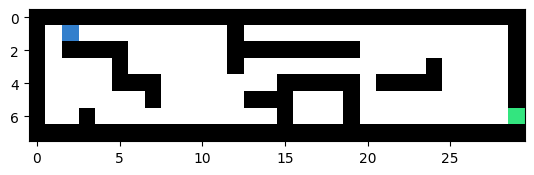

In [1]:
from maze_simulator import Maze

mapa = """
##############################
# o         #                #
# ####      ########         #
#    #      #           #    #
#    ###       ##### ####    #
#      #     ###   #         #
#  #           #   #         x
##############################
"""

ent = Maze(mapa)
ent.draw()

## Creación del algoritmo primero en amplitud

El algoritmo primero en profundidad requiere de una pila de tipo LIFO, asimismo, definiremos una clase para los nodos del árbol y una función para expandir estos nodos construyendo los nodos hijos.

#### Pila

La pila LIFO (Last-In-First-Out) es una pila que hace pop sobre los elementos que han entrado al último. De esta forma, en la expansión del árbol de búsqueda se tiene que los nodos que se expandirán primero son aquellos que están a mayor profundidad en el árbol, que son los nodos que han entrado al último en la pila.

Para definir esta pila, usamos una lista que guarda los elementos/nodos. Definimos la función <i>push</i> que introducirá nuevos elementos, y la función <i>pop</i> que sacará al elemento en el tope de la pila. También requerimos de una función que nos indique cuando la pila está vacía, pues esta se usará en el algoritmo.

In [2]:
class LIFOQueue(object):
    """Clase de una cola FIFO en los problemas de búsqueda"""
    def __init__(self):
        self.queue = []
  
    def __str__(self):
        return ' '.join([str(q) for q in self.queue])
  
    def isEmpty(self):
        """Revisa si la pila es vacía"""
        return self.queue == []
  
    def push(self, element):
        """Introduce un elemento a la pila"""
        self.queue.append(element)
  
    def pop(self):
        """Saca el primer elemento de la pila"""
        last_element = self.queue[-1]
        del self.queue[-1]
    
        return last_element
    
    def top(self):
        """Muestra el elemento en el tope de la pila"""
        item = self.queue[-1]
        
        return item

#### Expansión de nodos

Definimos un nodo como un objecto que tendrá los siguientes elementos: 1) un estado, que indicará precisamente qué estado del mundo representa este nodo; 2) padre, que indica de dónde viene el nodo actual; y 3) acción, que indica que acción generó al nodo.

Para expandir los nodos, usamos las acciones legales y aplicamos la función que nos da el resultado de esa acción aplicada al estado actual. Con el resultado, generamos nuevos nodos hijos del árbol de búsqueda.

In [3]:
class Node(object):
    """Clase para crear nodos con sus atributos"""
    def __init__(self):
        self.state = (0,0)
        self.parent = None 
        self.action = None
        #self.cost = 0 #El costo no es tomado en cuenta en este método
        
    def __str__(self):
        if self.parent == None:
            return "State: {}".format(self.state)
        else:
            return "State: {}, Action: {}, Parent: {}".format(self.state,self.action,self.parent.state)
            
            
def expand(problem, node):
    """Función para expandir los nodos dado el problema"""
    #Nodo inicial
    s = node.state 

    for action in problem.actions(s):
        #Ejecuta la acción
        new_s = problem.result(s, action)
        
        #Genera un nuevo nodo
        new_node,new_node.state,new_node.parent,new_node.action = Node(),new_s,node,action
        
        yield new_node

### Algoritmo

El algoritmo de primero en profundidad usa la pila LIFO para expandir los nodos de mayor profundidad primero. El algoritmo consta de los siguientes pasos:

1. Guarda el nodo inicial
2. Genera la frontera con este primer nodo, donde la frontera es una pila LIFO
3. Mientras la frontera esté vacía realiza:
    1. Saca el nodo del tope de la pila; es decir, el de mayor profundidad
    2. Revisa si este nodo es terminal, si lo es termina
    3. En otro caso, expande el nodo
    4. Guarda los nodos hijos en la frontera.
    
El algoritmo terminará entonces cuando la meta es alcanzada. 

Además de la forma de expandir los nodos, este algoritmo se diferencia del primero en amplitud en que la revisión de si un nodo es meta se hace al sacar al nodo de la pila y cuando los nodos hijos se expanden. A esta estrategia se le conoce como <i>Late Goal Test</i> (prueba tardía de meta), pues revisa si el nodo es meta hasta que este ha sido expulsado de la pila y no inmediatamente al ser generado.

In [4]:
def DepthFirstSearch(problem):
    """Algoritmo Breadth-First Search"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial
    
    #Revisa si el nodo es meta
    if node in problem.goal:
        return nodes
    
    #Frontera con cola de prioridad
    frontier = LIFOQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Revisa si el nodo es meta
        if problem.is_goal(node.state):
            nodes.append(child)
            return nodes
        #Guarda el nodo en la lista
        nodes.append(node)
        
        #Expande el nodo actual
        for child in expand(problem, node):
            #Guarda el estado del hijo
            state = child.state
            
            #Guarda los hijos no alcanzados o que tengan menor costo
            if state not in reached.keys():
                reached[state] = child
                frontier.push(child)
        
    #Si no logra llegar a un nodo final
    #El algoritmo regresa mensaje de error
    return "No se ha logrado llegar a un estado final."

#### Aplicación del algoritmo

Ahora aplicamos el algoritmo al problema del laberinto y a partir de esto obtenemos el camino solución para que el agente alcance la meta. Ilustramos las acciones en el camino que sigue el agente hasta la meta.

In [5]:
#Aplica el algoritmo al problema
tree = DepthFirstSearch(ent)

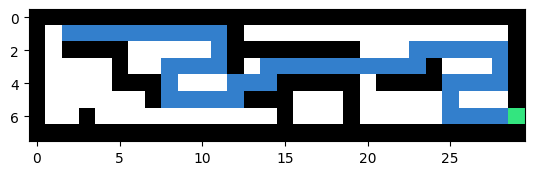

In [6]:
def get_path(search_tree, root):
    """Recorre el árbol de búsqueda de atrás hacia el inicio para obtener el camino de acciones
    que llevaron a la meta."""
    #Meta
    leaf = search_tree[::-1][0]
    #Padre de la meta
    parent = leaf.parent
    #Adjunta la meta y su padre al camino
    path = [leaf, parent]
    #Recorre el árbol de búsqueda hasta el inicial
    while parent.state != root:
        parent = parent.parent
        #Adjunta los padres en el camino
        path.append(parent)
        
    return path[::-1]

#Visualiza la solución
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state
    
ent.draw()

Uno de los problemas del algoritmo de primero en profundidad es que puede encontrar soluciones de mayor longitud, pues si existe una solución no-optima, un camino de mayor longitud en el árbol, esta se seguirá explorando hasta encontrar una solución. Por tanto, si bien puede encontrar una solución, esta no será necesariamente la más óptima. Esto es uno de los riesgos de expandir los nodos más profundos. En este caso, por ejemplo, se nota que la solución encontrada es menos óptima que la encontró el algoritmo de primero en amplitud.